In [1]:
using Flux
using CUDA
#using Distributed

In [2]:
addprocs(16)

16-element Vector{Int64}:
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
 14
 15
 16
 17

In [2]:
#@everywhere include("sparseir_setting.jl")
include("sparseir_setting.jl")

create_data9 (generic function with 1 method)

In [4]:
@everywhere using SharedArrays

In [13]:
function dataset(n::Int, w_size::Int, n_gauss::Int, ir::IR_params)
    l = length(ir.basis.s)
    inputs = SharedArray(zeros(Float32, l, n))
    outputs = SharedArray(zeros(Float32, 3n_gauss, n))
    @sync @distributed for i in 1:n
        inputs[:,i], outputs[:,i] = create_data7(w_size, n_gauss, ir)
    end
    return Matrix(inputs), Matrix(outputs)
end

function dataset6_order(n::Int, w_size::Int, n_gauss::Int, ir::IR_params)
    l = length(ir.basis.s)
    mu_order = set_mu_order(n_gauss, [collect(-0.9f0:0.3f0:0.9f0)...])
    σ_order = set_σ_order(n_gauss, [-4.0f0, -2.0f0, 0.0f0])
    ϕ_order = set_ϕ_order(n_gauss, [-2.0f0, 0f0, 3.0f0])
    l1 = length(mu_order)
    l2 = length(σ_order)
    l3 = length(ϕ_order)
    LL = l1*l2*l3
    inputs = zeros(Float32, l, LL)
    outputs = zeros(Float32, 3n_gauss, LL)
    it = 1
    @showprogress for mu in mu_order, σ in σ_order, ϕ in ϕ_order
        inputs[:,it], outputs[:,it] = create_data6_orderly(w_size, n_gauss, ir, mu, σ, ϕ)
        it += 1
    end
    return inputs, outputs
end

function dataset6_order2(n::Int, w_size::Int, n_gauss::Int, ir::IR_params)
    l = length(ir.basis.s)
    mu_order = set_mu_order2(n_gauss, [-0.4f0, 0.4f0])
    σ_order = set_σ_order(n_gauss, [-4.0f0, -2.0f0, 0.0f0])
    ϕ_order = set_ϕ_order(n_gauss, [-2.0f0, 0f0, 3.0f0])
    l1 = length(mu_order)
    l2 = length(σ_order)
    l3 = length(ϕ_order)
    LL = l1*l2*l3
    inputs = zeros(Float32, l, LL)
    outputs = zeros(Float32, 3n_gauss, LL)
    it = 1
    @showprogress for mu in mu_order, σ in σ_order, ϕ in ϕ_order
        inputs[:,it], outputs[:,it] = create_data6_orderly2(w_size, n_gauss, ir, mu, σ, ϕ)
        it += 1
    end
    return inputs, outputs
end

function dataset6_order_p(n::Int, w_size::Int, n_gauss::Int, ir::IR_params)
    l = length(ir.basis.s)
    mu_order = set_mu_order(n_gauss, [collect(-0.9f0:0.3f0:0.9f0)...])
    σ_order = set_σ_order(n_gauss, [-4.0f0, -2.0f0, 0.0f0])
    ϕ_order = set_ϕ_order(n_gauss, [-2.0f0, 0f0, 3.0f0])
    l1 = length(mu_order)
    l2 = length(σ_order)
    l3 = length(ϕ_order)
    LL = l1*l2*l3
    inputs = SharedArray(zeros(Float32, l, LL))
    outputs = SharedArray(zeros(Float32, 3n_gauss, LL))
    it = 1
    @sync @distributed for i in 1:l1
        for j in 1:l2, k in 1:l3
            it = (i-1)*l2*l3 + (j-1)*l3 + k
            inputs[:,it], outputs[:,it] = create_data6_orderly(w_size, n_gauss, ir, mu_order[i], σ_order[j], ϕ_order[k])
        end
    end
    return Matrix(inputs), Matrix(outputs)
end

function dataset6_order2_p(n::Int, w_size::Int, n_gauss::Int, ir::IR_params)
    l = length(ir.basis.s)
    mu_order = set_mu_order2(n_gauss, [-0.4f0, 0.4f0])
    σ_order = set_σ_order(n_gauss, [-4.0f0, -2.0f0, 0.0f0])
    ϕ_order = set_ϕ_order(n_gauss, [-2.0f0, 0f0, 3.0f0])
    l1 = length(mu_order)
    l2 = length(σ_order)
    l3 = length(ϕ_order)
    LL = l1*l2*l3
    inputs = SharedArray(zeros(Float32, l, LL))
    outputs = SharedArray(zeros(Float32, 3n_gauss, LL))
    it = 1
    @sync @distributed for i in 1:l1
        for j in 1:l2, k in 1:l3
            it = (i-1)*l2*l3 + (j-1)*l3 + k
            inputs[:,it], outputs[:,it] = create_data6_orderly2(w_size, n_gauss, ir, mu_order[i], σ_order[j], ϕ_order[k],[0.4f0, 0.5f0, 1.0f0])
        end
    end
    return Matrix(inputs), Matrix(outputs)
end

function dataset6_order2_p2(n::Int, w_size::Int, n_gauss::Int, ir::IR_params)
    l = length(ir.basis.s)
    mu_order = set_mu_order2(n_gauss, [-0.4f0, 0.0f0, 0.4f0])
    σ_order = set_σ_order(n_gauss, [-3.0f0, -1.0f0])
    ϕ_order = set_ϕ_order(n_gauss, [-1.0f0, 1.0f0])
    l1 = length(mu_order)
    l2 = length(σ_order)
    l3 = length(ϕ_order)
    println("l1: ",l1, " l2: ", l2, " l3: ", l3)
    LL = l1*l2*l3
    inputs = SharedArray(zeros(Float32, l, LL))
    outputs = SharedArray(zeros(Float32, 3n_gauss, LL))
    it = 1
    @sync @distributed for i in 1:l1
        for j in 1:l2, k in 1:l3
            it = (i-1)*l2*l3 + (j-1)*l3 + k
            inputs[:,it], outputs[:,it] = create_data6_orderly2(w_size, n_gauss, ir, mu_order[i], σ_order[j], ϕ_order[k], [0.3f0, 1.5f0, 2.5f0])
        end
    end
    return Matrix(inputs), Matrix(outputs)
end

function dataset6(n::Int, w_size::Int, n_gauss::Int, ir::IR_params)
    l = length(ir.basis.s)
    inputs = SharedArray(zeros(Float32, l, n))
    outputs = SharedArray(zeros(Float32, 3n_gauss, n))
    @sync @distributed for i in 1:n
        inputs[:,i], outputs[:,i] = create_data6(w_size, n_gauss, ir)
    end
    return Matrix(inputs), Matrix(outputs)
end


function dataset6c(n::Int, w_size::Int, n_gauss::Int, ir::IR_params)
    l = length(ir.basis.s)
    inputs = SharedArray(zeros(Float32, l, n))
    outputs = SharedArray(zeros(Float32, 3n_gauss, n))
    @sync @distributed for i in 1:n
        inputs[:,i], outputs[:,i] = create_data6_c(w_size, n_gauss, ir)
    end
    return Matrix(inputs), Matrix(outputs)
end

function dataset6_wNoise(n::Int, w_size::Int, n_gauss::Int, ir::IR_params)
    l = length(ir.basis.s)
    inputs = SharedArray(zeros(Float32, l, n))
    outputs = SharedArray(zeros(Float32, 3n_gauss, n))
    @sync @distributed for i in 1:n
        inputs[:,i], outputs[:,i] = create_data6(w_size, n_gauss, ir)
    end
    inputs += 1f-5*randn(Float32, l,n)
    return Matrix(inputs), Matrix(outputs)
end
function dataset6c_wNoise(n::Int, w_size::Int, n_gauss::Int, ir::IR_params)
    l = length(ir.basis.s)
    inputs = SharedArray(zeros(Float32, l, n))
    outputs = SharedArray(zeros(Float32, 3n_gauss, n))
    @sync @distributed for i in 1:n
        inputs[:,i], outputs[:,i] = create_data6_c(w_size, n_gauss, ir)
    end
    inputs += 1f-5*randn(Float32, l,n)
    return Matrix(inputs), Matrix(outputs)
end
function dataset6_2(n::Int, w_size::Int, n_gauss::Int, ir::IR_params)
    l = length(ir.basis.s)
    inputs = SharedArray(zeros(Float32, l, n))
    outputs = SharedArray(zeros(Float32, 3n_gauss, n))
    @sync @distributed for i in 1:n
        inputs[:,i], outputs[:,i] = create_data6_2(w_size, n_gauss, ir)
    end
    return Matrix(inputs), Matrix(outputs)
end
function dataset6_4(n::Int, w_size::Int, n_gauss::Int, ir::IR_params)
    l = length(ir.basis.s)
    inputs = SharedArray(zeros(Float32, l, n))
    outputs = SharedArray(zeros(Float32, 3n_gauss, n))
    @sync @distributed for i in 1:n
        inputs[:,i], outputs[:,i] = create_data6_4(w_size, n_gauss, ir)
    end
    return Matrix(inputs), Matrix(outputs)
end


dataset6_4 (generic function with 1 method)

In [8]:
function dataset_sym(n::Int, w_size::Int, n_gauss::Int, ir::IR_params)
    l = length(ir.basis.s)
    inputs = SharedArray(zeros(Float32, l, n))
    outputs = SharedArray(zeros(Float32, 9, n))
    @sync @distributed for i in 1:n
        inputs[:,i], outputs[:,i] = create_data9(w_size, n_gauss, ir)
    end
    return Matrix(inputs), Matrix(outputs)
end

dataset_sym (generic function with 1 method)

In [3]:
ir_test = set_IR(100.0, 1.0, 1e-15)

IR_params(100.0, 1.0, FiniteTempBasis{Fermionic, LogisticKernel}(LogisticKernel(100.0), SparseIR.SVEResult{LogisticKernel}(SparseIR.PiecewiseLegendrePoly[SparseIR.PiecewiseLegendrePoly(16, -1.0, 1.0, [-1.0, -0.9971969191007053, -0.9939631887430201, -0.9902327485573953, -0.9859294594055299, -0.9809655949653976, -0.9752401232983684, -0.9686367577352446, -0.9610217593708021, -0.9522414800459728  …  0.9522414800459728, 0.9610217593708021, 0.9686367577352446, 0.9752401232983684, 0.9809655949653976, 0.9859294594055299, 0.9902327485573953, 0.9939631887430201, 0.9971969191007053, 1.0], [0.0028030808992947076, 0.0032337303576851495, 0.0037304401856248504, 0.004303289151865397, 0.004963864440132304, 0.005725471667029192, 0.0066033655631237975, 0.00761499836444246, 0.008780279324829388, 0.010121832962441735  …  0.010121832962441735, 0.008780279324829388, 0.00761499836444246, 0.0066033655631237975, 0.005725471667029192, 0.004963864440132304, 0.004303289151865397, 0.0037304401856248504, 0.003233730

In [4]:
l = length(ir_test.basis.u)

40

In [5]:
using ProgressMeter

In [6]:
K=5
#permsv = perms([1:K]...)

5

In [7]:
using JLD2

In [8]:
using BenchmarkTools

In [32]:
#dt_test = Flux.DataLoader(dataset6_order2_p2(100000, 10001, K, ir_test), batchsize=7776, shuffle=true)
#dt_test = Flux.DataLoader(dataset6c(8192, 10001, K, ir_test), batchsize=1024, shuffle=true)
dt_test = Flux.DataLoader(dataset6_2(32768, 10001, K, ir_test), batchsize=4096, shuffle=true)
#dt_test = Flux.DataLoader(dataset6c(512, 10001, K, ir_test), batchsize=128, shuffle=true)

8-element DataLoader(::Tuple{Matrix{Float32}, Matrix{Float32}}, shuffle=true, batchsize=4096)
  with first element:
  (40×4096 Matrix{Float32}, 15×4096 Matrix{Float32},)

In [8]:
#dt_test = load("data_16384_e10_data6.jld2")["dt_test"]
#dt_test = load("data_65536_4096_e10_data7.jld2")["dt_test"]
dt_test = load("data_32_7776_e15_data6_order.jld2")["dt_test"]

32-element DataLoader(::Tuple{Matrix{Float32}, Matrix{Float32}}, shuffle=true, batchsize=7776)
  with first element:
  (40×7776 Matrix{Float32}, 15×7776 Matrix{Float32},)

In [35]:
Base.summarysize(dt_test)

47764208

In [33]:
@save "data_40_32768_b4096_e15_data6muphi_3.jld2" dt_test

In [9]:
K=5

5

In [31]:
function gm(μ::Float32, Σ::Float32, ϕ::Float32)
    f(x::Float32) = Float32(ϕ*exp(-(x-μ)^2/(2Σ^2))/sqrt(2π*Σ^2))
    return f
end

function gmm(K::Int, μ::Vector{Float32}, Σ::Vector{Float32}, ϕ::Vector{Float32})
    g(x::Float32) = 0.0f0
    for i in 1:K
        g += gm(μ[i], Σ[i], ϕ[i])
    end
    return g
end

gmm (generic function with 1 method)

In [32]:
g_test = gmm(2, [0.0f0, 1.0f0], [1.0f0, 1.0f0], [0.5f0, 0.5f0])

MethodError: MethodError: no method matching +(::var"#g#276", ::var"#f#275"{Float32, Float32, Float32})

Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...)
   @ Base operators.jl:587
  +(!Matched::PyCall.PyObject, ::Any)
   @ PyCall ~/.julia/packages/PyCall/1gn3u/src/pyoperators.jl:13
  +(::Any, !Matched::ChainRulesCore.ZeroTangent)
   @ ChainRulesCore ~/.julia/packages/ChainRulesCore/I1EbV/src/tangent_arithmetic.jl:100
  ...


In [9]:
include("model.jl")

add_noise_gpu! (generic function with 1 method)

In [10]:
model_test = init_model_multihead_relu(l, K, 32, 4, 12) |> gpu
#model_test = multihead_layer(64, 16, 4) |>gpu
#model_test = transformer_block(4, 16) |>gpu
#init_model_tanh(l, K, 64, 12) |> gpu
#init_model_multihead_tanh(l, K, 32, 64, 16, 4) |> gpu

Chain(
  Dense(40 => 128),                     # 5_248 parameters
  Chain(
    Parallel(
      +,
      Chain(
        Parallel(
          vcat,
          Chain(
            Parallel(
              Base.Broadcast.BroadcastFunction(*),
              Chain(
                Parallel(
                  Base.Broadcast.BroadcastFunction(*),
                  Dense(128 => 32),     # 4_128 parameters
                  Dense(128 => 32),     # 4_128 parameters
                ),
                normed40_softmax,
              ),
              Dense(128 => 32),         # 4_128 parameters
            ),
          ),
          Chain(
            Parallel(
              Base.Broadcast.BroadcastFunction(*),
              Chain(
                Parallel(
                  Base.Broadcast.BroadcastFunction(*),
                  Dense(128 => 32),     # 4_128 parameters
                  Dense(128 => 32),     # 4_128 parameters
                ),
                normed40_softmax,
              ),
        

create data!


Progress: 100%|█████████████████████████████████████████| Time: 0:23:11K


it: 1, loss: 0.3660455
it: 1, loss: 0.14604047


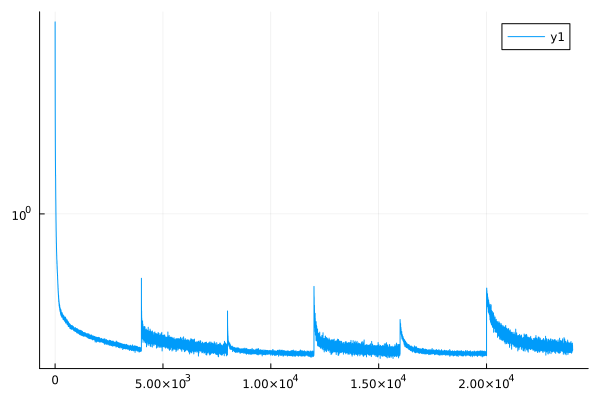

In [11]:

#l = length(ir_test.basis.s)
term = 500
ws0 = [range(-1.0f0,1.0f0, length=1001)...]
η = 1f-6
η2 = 1f-10

#model_test = init_model_attention(l, K, 64, 64, 8) |> gpu
#model_test = init_model_sig_rms(l, K, 512, 16) |> gpu
test_data = []
lss = []

for it in 1:1
    #opt = Adam(1f-4)
    opt = ADAM(η)
    #opt = Flux.Optimiser(WeightDecay(1f-10), ADAM(η))
    #opt = Flux.Optimiser(WeightDecay(1f-8), Adam(2f-7))
    #dt = load("data_40_65536_e15_data6_1.jld2")["dt_test"]
    
    dt1 = load("data_40_32768_b4096_e15_data6muphi_1.jld2")["dt_test"]
    dt2 = load("data_40_32768_b4096_e15_data6muphi_2.jld2")["dt_test"]
    dt3 = load("data_40_32768_b4096_e15_data6muphi_3.jld2")["dt_test"]
    #dt_test

    println("create data!")

    #=
    @showprogress for epoch in 1:term
        if(epoch%(term) == 1)
            if(epoch < 3term)
                opt = Flux.Optimiser(WeightDecay(1f-8), Adam(4f-8))
            elseif(epoch < 4term)
                opt = Flux.Optimiser(WeightDecay(1f-8), Adam(1f-5))
            else
                opt = Flux.Optimiser(WeightDecay(1f-9), Adam(1f-6))
            end
            #opt = Adam(4f-6)
        end
        for (input, target) in dt
            val, grads = Flux.withgradient(Flux.params(model_test)) do
            #grads = Flux.gradient(Flux.params(model_test)) do
                #loss4(model_test, K, input, target, 5.0f0)
                #loss4_symGP3(model_test, K, input, target, 5.0f0)
                loss_KL(model0, K, input, target, ws0)
            end
            Flux.Optimise.update!(opt, Flux.params(model_test), grads)
            #Flux.update!(opt_state, model_test, grads[1])
            push!(lss, val)
        end
    end=#
    
    @showprogress for epoch in 1:6term-1
        #if(epoch%2term == 1)
        #    dt = load("data_40_65536_e15_data6_$(div(epoch-1, 2term)+1).jld2")["dt_test"]
        
        if(epoch%3 == 1)
            dt = dt1
        elseif(epoch%3 == 2)
            dt = dt2
        else
            dt = dt3
        end
            #Flux.DataLoader(dataset6(100000, 10001, K, ir_test), batchsize=4096, shuffle=true)
        #end
        #if(epoch < term + 1)
        if(epoch % 2term < term+1)
            
            if(epoch % 2term == 0)
                η = 0.3f0η
                opt = Flux.Optimiser(WeightDecay(1f-10), ADAM(η))
                #opt = Adam(2f-6)
            end
            for (input, target) in dt
                #add_noise!(input, η2)
                val, grads = Flux.withgradient(Flux.params(model_test)) do
                    loss2_3(model_test, K, input, target, 10.0f0)
                    #loss_gmm_dkl(model_test, K, input, target, ws0)
                end
                Flux.Optimise.update!(opt, Flux.params(model_test), grads)
                push!(lss, val)
            end
            #=
        elseif(epoch < 2term + 1)
            opt = Flux.Optimiser(WeightDecay(1f-7), Adam(2f-6))
            for (input, target) in dt
                val, grads = Flux.withgradient(Flux.params(model_test)) do
                #grads = Flux.gradient(Flux.params(model_test)) do
                    loss4(model_test, K, input, target, 5.0f0)
                end
                Flux.Optimise.update!(opt, Flux.params(model_test), grads)
                #Flux.update!(opt_state, model_test, grads[1])
                push!(lss, val)
            end=#
        else
            if(epoch % 2term == term + 1)
                η = 0.3f0η
                opt = Flux.Optimiser(WeightDecay(1f-10), ADAM(η))
            end
            for (input, target) in dt
                #add_noise!(input, η2)
                val, grads = Flux.withgradient(Flux.params(model_test)) do
                    loss4_3(model_test, K, input, target, 0.8f0)
                    #loss_gmm_dkl(model_test, K, input, target, ws0)
                end
                Flux.Optimise.update!(opt, Flux.params(model_test), grads)
                push!(lss, val)
            end
        end
    end
    #=
    @showprogress for epoch in 1:6term
        if(epoch%term == 1)
            opt = ADAM(2f-7)
            #Flux.Optimiser(WeightDecay(1f-8), Adam(2f-7))
        end
        for (input, target) in dt
            val, grads = Flux.withgradient(Flux.params(model_test)) do
                loss_gmm_ws2(model_test, K, input, target, 0.0f0)
            end
            Flux.Optimise.update!(opt, Flux.params(model_test), grads)
            push!(lss, val)
        end
    end=#

    test = first(load("data_40_32768_b4096_e15_data6muphi_1.jld2")["dt_test"])
    #first(dt_test)
    println("it: $(it), loss: $(loss4_3(model_test, K, test[1], test[2], 2.0f0))")
    println("it: $(it), loss: $(loss4_3(model_test, K, test[1], test[2], 0.0f0))")
    #println("it: $(it), loss: $(loss_gmm_dkl(model_test, K, test[1], test[2], ws0))")
    #println("it: $(it), loss: $(loss_sym(model_test, K, cu(test[1], test[2], 0.0f0))")
    push!(test_data, test)
end
plot(lss,yaxis=:log10, yticks=[1e4, 1e3, 1e2,1e1, 1e0,1e-1,1e-2, 1e-3, 1e-4])
#, xticks=[1e0, 1e1, 1e2, 1e3, 1e4, 1e5])

In [12]:
plot(lss,yaxis=:log10, yticks=[1e4, 1e3, 1e2,1e1, 1e0,1e-1,1e-2, 1e-3, 1e-4])

In [49]:
mc = cpu(model_test)

Chain(
  Dense(40 => 512),                     # 20_992 parameters
  RMSLayerNorm{Diagonal{Float32, Vector{Float32}}}(Float32[0.97137505 0.0 … 0.0 0.0; 0.0 1.0075163 … 0.0 0.0; … ; 0.0 0.0 … 1.0579678 0.0; 0.0 0.0 … 0.0 0.9457096]),  # 262_144 parameters
  Chain(
    Dense(512 => 512),                  # 262_656 parameters
    RMSLayerNorm{Diagonal{Float32, Vector{Float32}}}(Float32[1.1504517 0.0 … 0.0 0.0; 0.0 1.1341373 … 0.0 0.0; … ; 0.0 0.0 … 1.1693751 0.0; 0.0 0.0 … 0.0 1.1962715]),  # 262_144 parameters
    NNlib.σ,
  ),
  Chain(
    Dense(512 => 512),                  # 262_656 parameters
    RMSLayerNorm{Diagonal{Float32, Vector{Float32}}}(Float32[1.2738229 0.0 … 0.0 0.0; 0.0 1.2766187 … 0.0 0.0; … ; 0.0 0.0 … 1.282985 0.0; 0.0 0.0 … 0.0 1.1413287]),  # 262_144 parameters
    NNlib.σ,
  ),
  Chain(
    Dense(512 => 512),                  # 262_656 parameters
    RMSLayerNorm{Diagonal{Float32, Vector{Float32}}}(Float32[1.3295379 0.0 … 0.0 0.0; 0.0 1.4263034 … 0.0 0.0; … ; 0.0 0.0

In [24]:
BSON.@save "model_phi_rms_sigmoid_512_16_with_noise_K5.bson" mc

In [55]:
model0 = mc |> gpu

Chain(
  Dense(30 => 256),                     # 7_936 parameters
  LayerNorm(256),                       # 512 parameters
  Chain(
    Dense(256 => 256, tanh),            # 65_792 parameters
    LayerNorm(256),                     # 512 parameters
  ),
  Chain(
    Dense(256 => 256, tanh),            # 65_792 parameters
    LayerNorm(256),                     # 512 parameters
  ),
  Chain(
    Dense(256 => 256, tanh),            # 65_792 parameters
    LayerNorm(256),                     # 512 parameters
  ),
  Chain(
    Dense(256 => 256, tanh),            # 65_792 parameters
    LayerNorm(256),                     # 512 parameters
  ),
  Chain(
    Dense(256 => 256, tanh),            # 65_792 parameters
    LayerNorm(256),                     # 512 parameters
  ),
  Chain(
    Dense(256 => 256, tanh),            # 65_792 parameters
    LayerNorm(256),                     # 512 parameters
  ),
  Chain(
    Dense(256 => 256, tanh),            # 65_792 parameters
    LayerNorm(256),   

In [144]:
BSON.@load "model_μσ_sp.bson" mc

In [145]:
model_test = mc |> gpu

Chain(
  Dense(34 => 256),                     # 8_960 parameters
  LayerNorm(256),                       # 512 parameters
  Chain(
    Dense(256 => 256, softplus),        # 65_792 parameters
    LayerNorm(256),                     # 512 parameters
  ),
  Chain(
    Dense(256 => 256, softplus),        # 65_792 parameters
    LayerNorm(256),                     # 512 parameters
  ),
  Chain(
    Dense(256 => 256, softplus),        # 65_792 parameters
    LayerNorm(256),                     # 512 parameters
  ),
  Chain(
    Dense(256 => 256, softplus),        # 65_792 parameters
    LayerNorm(256),                     # 512 parameters
  ),
  Chain(
    Dense(256 => 256, softplus),        # 65_792 parameters
    LayerNorm(256),                     # 512 parameters
  ),
  Chain(
    Dense(256 => 256, softplus),        # 65_792 parameters
    LayerNorm(256),                     # 512 parameters
  ),
  Chain(
    Dense(256 => 256, softplus),        # 65_792 parameters
    LayerNorm(256),   

In [12]:

#=
function data2dist(out::Vector{Float32}, K::Int, w_size::Int)
    ws = [range(-1.0f0,1.0f0, length=w_size)...]
    l = length(out)
    phi = out[2K+1:3K]
    mu = out[1:K]
    sigma = out[K+1:2K]
    rho = [gmm1(K, w, mu, sigma, phi) for w in ws]
    return rho
end=#

function data2dist(out::Vector{Float32}, K::Int, w_size::Int)
    ws = [range(-1.0f0,1.0f0, length=w_size)...]
    l = length(out)
    phi = out[2K+1:3K]
    mu = out[1:K]
    sigma = exp.(out[K+1:2K])
    rho = [gmm1(K, w, mu, sigma, phi) for w in ws]
    return rho
end

function data2dist_c(out::Vector{Float32}, K::Int, w_size::Int)
    ws = [range(-1.0f0,1.0f0, length=w_size)...]
    l = length(out)
    phi = out[2K+1:3K]
    mu = out[1:K]
    sigma = exp.(out[K+1:2K])
    rho = [ccm(K, w, mu, sigma, phi) for w in ws]
    return rho
end

function out2dist(out::Vector{Float32}, K::Int, w_size::Int)
    ws = [range(-1.0f0,1.0f0, length=w_size)...]
    l = length(out)
    phi = softmax(out[2K+1:3K])
    mu = out[1:K]
    sigma = exp.(out[K+1:2K])
    rho = [gmm1(K, w, mu, sigma, phi) for w in ws]
    return rho
end

function out2dist_c(out::Vector{Float32}, K::Int, w_size::Int)
    ws = [range(-1.0f0,1.0f0, length=w_size)...]
    l = length(out)
    phi = softmax(out[2K+1:3K])
    mu = out[1:K]
    sigma = exp.(out[K+1:2K])
    rho = [ccm(K, w, mu, sigma, phi) for w in ws]
    return rho
end

function out2dist_sym(out::Vector{Float32}, K::Int, w_size::Int)
    ws = [range(-1.0f0,1.0f0, length=w_size)...]
    l = length(out)
    phi = softmax(out[2K+1:3K])
    perm = sortperm(phi; rev=true)
    mu = out[1:K]
    sigma = exp.(out[K+1:2K])
    rho = [gmm1(K, w, mu[perm], sigma[perm], phi[perm]) for w in ws]
    return rho
end

function out2dist2(out::Vector{Float32}, K::Int, w_size::Int)
    ws = [range(-1.0f0,1.0f0, length=w_size)...]
    l = length(out)
    phi = softmax(5out[3:3:3K])
    mu = out[1:3:3K]
    sigma = exp.(6out[2:3:3K])
    rho = [gmm1(K, w, mu, sigma, phi) for w in ws]
    return rho
end

function sym2dist(out::Vector{Float32}, K::Int, w_size::Int)
    ws = [range(-1.0f0,1.0f0, length=w_size)...]
    @show params = sym2params2(out)
    phi = params[2K+1:3K]
    mu = params[1:K]
    sigma = params[K+1:2K]
    rho = [gmm1(K, w, mu, sigma, phi) for w in ws]
    return rho
end

function sym2dist_2(out::Vector{Float32}, K::Int, w_size::Int)
    ws = [range(-1.0f0,1.0f0, length=w_size)...]
    @show params = sym2params2_2(out)
    phi = params[2K+1:3K]
    mu = params[1:K]
    sigma = params[K+1:2K]
    rho = [gmm1(K, w, mu, sigma, phi) for w in ws]
    return rho
end

sym2dist_2 (generic function with 1 method)

In [13]:
function show_example(gl::Matrix{Float32}, ans::Matrix{Float32}, model)
    id = rand(1:size(gl,2))
    out = cpu(model(cu(gl[:,id:id])))
    rho_true = data2dist(ans[:,id], K, 1001)
    rho_NN = out2dist(out[:,1], K, 1001)
    ws_test = [range(-1.0f0,1.0f0, length=1001)...]
    p = plot(ws_test, rho_true, linewidth=3, label="True", title="id = $(id)")
    p = plot!(ws_test, rho_NN, linewidth=2, label="NN")
    return p
end

function show_example_c(gl::Matrix{Float32}, ans::Matrix{Float32}, model)
    id = rand(1:size(gl,2))
    out = cpu(model(cu(gl[:,id:id])))
    rho_true = data2dist_c(ans[:,id], K, 1001)
    rho_NN = out2dist_c(out[:,1], K, 1001)
    ws_test = [range(-1.0f0,1.0f0, length=1001)...]
    p = plot(ws_test, rho_true, linewidth=3, label="True", title="id = $(id)")
    p = plot!(ws_test, rho_NN, linewidth=2, label="NN")
    return p
end

function show_example_sort(gl::Matrix{Float32}, ans::Matrix{Float32}, model)
    id = rand(1:size(gl,2))
    out = cpu(model(cu(gl[:,id:id])))
    rho_true = data2dist(ans[:,id], K, 1001)
    rho_NN = out2dist_sym(out[:,1], K, 1001)
    ws_test = [range(-1.0f0,1.0f0, length=1001)...]
    p = plot(ws_test, rho_true, linewidth=3, label="True", title="id = $(id)")
    p = plot!(ws_test, rho_NN, linewidth=2, label="NN")
    return p
end

function show_example2(gl::Matrix{Float32}, ans::Matrix{Float32}, model)
    id = rand(1:size(gl,2))
    out = cpu(model(cu(gl[:,id:id])))
    rho_true = data2dist(ans[:,id], K, 1001)
    rho_NN = out2dist2(out[:,1], K, 1001)
    ws_test = [range(-1.0f0,1.0f0, length=1001)...]
    p = plot(ws_test, rho_true, linewidth=3, label="True", title="id = $(id)")
    p = plot!(ws_test, rho_NN, linewidth=2, label="NN")
    return p
end


show_example2 (generic function with 1 method)

In [14]:
#test_gl, gmm_test = first(load("data_40_65536_e15_data6_1.jld2")["dt_test"])
test_gl, gmm_test = first(load("data_40_32768_b4096_e15_data6muphi_1.jld2")["dt_test"])

(Float32[-1.0248264 -0.57554466 … -0.560274 -1.0949938; -0.34199232 -0.5152915 … 0.62386674 -0.34159812; … ; 0.025651133 0.02685943 … -0.027306354 0.025567267; 0.02415085 0.023293974 … -0.026726186 0.027631035], Float32[-0.09589099 -0.73203963 … -0.80346155 -0.06933863; -0.28943905 -0.2841916 … 0.6340635 0.49981052; … ; 0.010044404 0.076190695 … 0.16097847 0.1875081; 0.5671506 0.040904313 … 0.4523073 0.26410687])

In [15]:
show_example(test_gl, gmm_test, model_test)

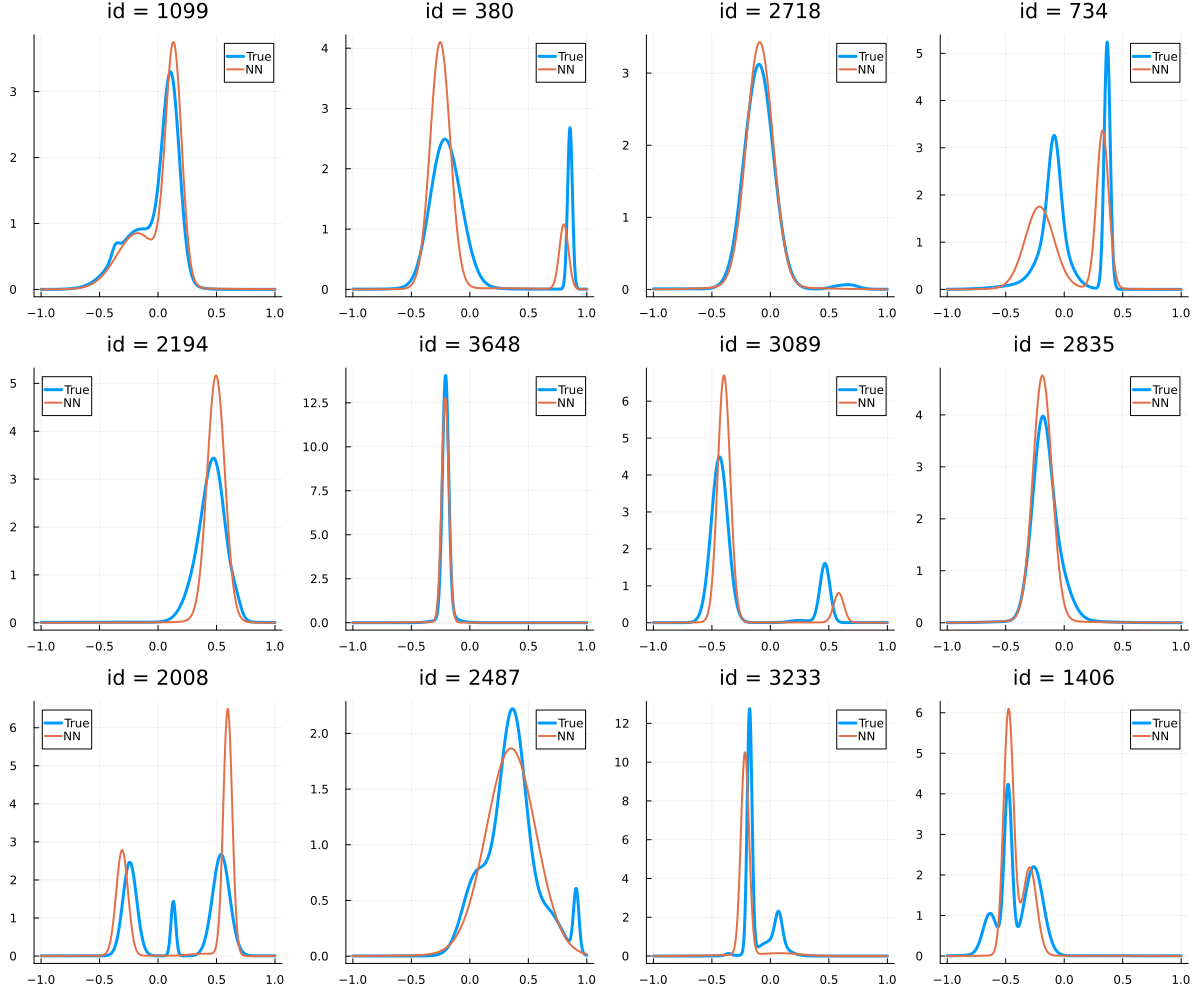

In [16]:
ps = [show_example(test_gl, gmm_test, model_test) for i in 1:12]
plot(ps..., size=(1200, 1000))

In [27]:
@show test = 5rand(4,3)
@show test2 = softmax(test)
@show sum(test2[:,1])
@show sum(test2[1,:])

test = 5 * rand(4, 3) = [3.6133301909238047 4.190097382303303 4.83863826335199; 2.8605792588770407 2.940890331518192 4.542292818879879; 3.824836443454199 3.0495897824754694 3.009355890470597; 1.747718410923798 3.5778524843940533 4.48317824953145]
test2 = softmax(test) = [0.3494782917768829 0.46543639895373 0.3838903885303805; 0.1646283510431872 0.13345554245595956 0.2854342260184866; 0.43179360162124686 0.148779874022271 0.06162543507775769; 0.05409975555868314 0.25232818456803957 0.26904995037337526]
sum(test2[:, 1]) = 1.0
sum(test2[1, :]) = 1.1988050792609934


1.1988050792609934

In [21]:
test_gl, gmm_test = test_data[1]
#create_data5(4001, K, ir_test)
@show id = rand(1:1024)

println(gmm_test[1:K,id:id])
println(exp.(gmm_test[K+1:2K,id:id]))
println(gmm_test[2K+1:3K,id:id])
test_out = cpu(model_test(cu(test_gl[:,id:id])))
println(test_out[1:K,1])
println(exp.(test_out[K+1:2K,1]))
println(softmax(test_out[2K+1:3K,1]))
rho_true = data2dist(gmm_test[:,id], K, 1001)
println(gmm_test[:,id]-test_out[:,1])
rho_NN = out2dist(test_out[:,1], K, 1001)
ws_test = [range(-1.0f0,1.0f0, length=1001)...]

plot(ws_test, rho_true, linewidth=3, label="True")
plot!(ws_test, rho_NN, linewidth=2, label="NN")


LoadError: UndefVarError: `test_data` not defined

In [44]:
K=5

5

In [85]:
test_gl0, gmm_test0 = create_data6(10001, K, ir_test)
test_out0 = cpu(model_test(cu(test_gl0)))

15-element Vector{Float32}:
 -0.5200528
 -0.13429992
 -0.98247176
  0.7586834
  0.13033316
  3.938366
 -1.9231818
  3.9991934
  3.998277
  3.9994807
 -3.8231459
 -2.8702226
 -3.0424995
 -3.3062496
 -3.9024734

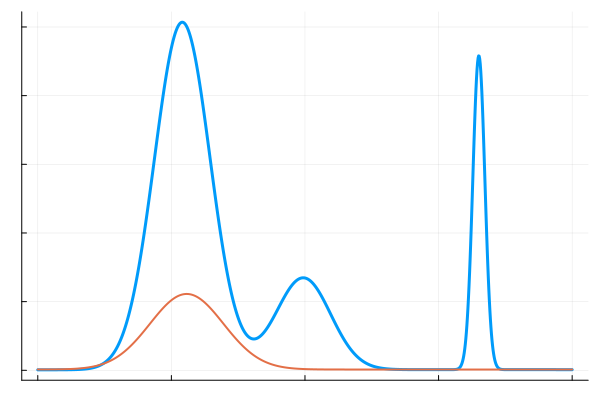

In [89]:
test_gl0, gmm_test0 = create_data6(10001, K, ir_test)
test_out0 = cpu(model_test(cu(test_gl0)))
rho_true0 = data2dist(gmm_test0, K, 1001)
rho_NN0 = out2dist(test_out0, K, 1001)
ws_test = [range(-1.0f0,1.0f0, length=1001)...]
p = plot(ws_test, rho_true0, linewidth=3, label="True")
p = plot!(ws_test, rho_NN0, linewidth=2, label="NN")

In [84]:
function check_example(model, w_size::Int)
    test_gl0, gmm_test0 = create_data6(10001, K, ir_test)
    #id = 2
    #println(gmm_test0[1:K])
    #println(exp.(gmm_test0[K+1:2K]))
    #println(gmm_test0[2K+1:3K])
    #test_gl0 += 1f-6 * randn(Float32, size(test_gl0)...)
    test_out0 = cpu(model(cu(test_gl0)))
    #test_out0 = cpu(model0(cu(test_gl0)))
    #println(test_out0[1:K])
    #println(exp.(test_out0[K+1:2K]))
    #println(softmax(test_out0[2K+1:3K]))
    rho_true0 = data2dist(gmm_test0, K, 1001)
    rho_NN0 = out2dist(test_out0, K, 1001)
    ws_test = [range(-1.0f0,1.0f0, length=1001)...]
    p = plot(ws_test, rho_true0, linewidth=3, label="True")
    p = plot!(ws_test, rho_NN0, linewidth=2, label="NN")
    return p
end

function check_example_c(model, w_size::Int)
    test_gl0, gmm_test0 = create_data6_c(10001, K, ir_test)
    #id = 2
    #println(gmm_test0[1:K])
    #println(exp.(gmm_test0[K+1:2K]))
    #println(gmm_test0[2K+1:3K])
    #test_gl0 += 1f-5 * randn(Float32, size(test_gl0)...)
    test_out0 = cpu(model(cu(test_gl0)))
    #test_out0 = cpu(model0(cu(test_gl0)))
    #println(test_out0[1:K])
    #println(exp.(test_out0[K+1:2K]))
    #println(softmax(test_out0[2K+1:3K]))
    rho_true0 = data2dist_c(gmm_test0, K, 1001)
    rho_NN0 = out2dist_c(test_out0, K, 1001)
    ws_test = [range(-1.0f0,1.0f0, length=1001)...]
    p = plot(ws_test, rho_true0, linewidth=3, label="True")
    p = plot!(ws_test, rho_NN0, linewidth=2, label="NN")
    return p
end

check_example_c (generic function with 1 method)

In [26]:
ps = [check_example(model_test, 10001) for i in 1:12]
plot(ps..., size=(1200, 1000))

Float32[0.4914166, 0.9306553, -0.20423463, 0.62915057]
Float32[0.073313735, 0.029178714, 0.45109355, 0.020992545]
Float32[0.00029661122, 0.00038367766, 0.00044606984, 0.99887365]
Float32[0.16324458, 0.35945708, 0.3668646, 0.63487154]
Float32[0.6276725, 0.22976539, 0.75234365, 0.02164906]
Float32[0.000107068496, 0.00030585972, 0.0010561554, 0.99853086]


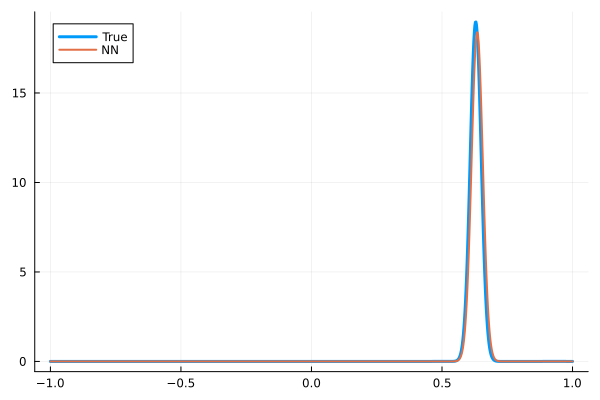

In [92]:
test_gl0, gmm_test0 = create_data6(10001, K, ir_test)
#id = 2
println(gmm_test0[1:K])
println(exp.(gmm_test0[K+1:2K]))
println(gmm_test0[2K+1:3K])
test_out0 = cpu(model_test(cu(test_gl0)))
#test_out0 = cpu(model0(cu(test_gl0)))
println(test_out0[1:K])
println(exp.(test_out0[K+1:2K]))
println(softmax(test_out0[2K+1:3K]))
rho_true0 = data2dist(gmm_test0, K, 1001)
rho_NN0 = out2dist(test_out0, K, 1001)
ws_test = [range(-1.0f0,1.0f0, length=1001)...]
plot(ws_test, rho_true0, linewidth=3, label="True")
plot!(ws_test, rho_NN0, linewidth=2, label="NN")

In [40]:
test_gl0, gmm_test0 = create_data8(10001, K, ir_test)

(Float32[-0.57695055, 0.6657015, -0.57295865, 0.47626513, -0.34827211, 0.24378656, 0.17769234, -0.21296135, 0.20547585, -0.1846944  …  0.06922414, -0.058945306, -0.059840698, 0.05844355, -0.054947414, 0.04949981, 0.04745103, -0.046882987, 0.044550948, -0.040803522], Float32[0.36184484, -7.0769024, 1.0, -0.083530754, 12.476284, 8.890975f-5, -1.4239893, -3.7490146, -0.15999155])

gp = EM(0.01f0, 5, wsf, true_ρ) = gParams(5, Float32[0.20046914, -6.742669f-8, -0.20046915, -0.0024808596, 0.0024225207], Float32[0.025154836, 0.4052729, 0.025154838, 0.2620037, 0.26200435], Float32[0.38765347, 0.045868568, 0.38765347, 0.088347025, 0.09047747])
test_out0 = cpu(model0(cu(gl0))) = Float32[0.0921391, 0.32944092, -0.0037335001, -0.22024553, 0.1307884, -0.5808923, 1.4183928, -2.3271933, -3.1058102, -3.411106, -4.8336515, -2.86294, 2.662253, 3.6307116, 3.9702306]


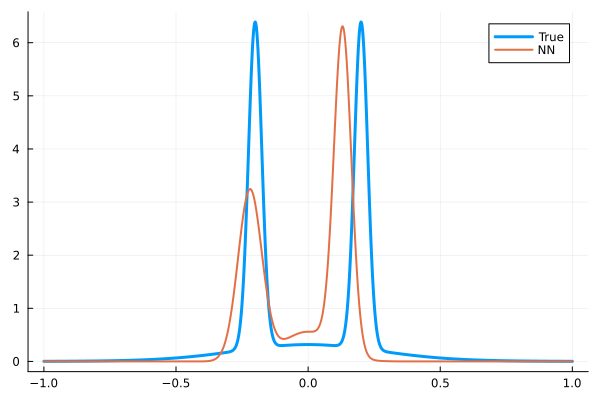

In [92]:
ws0 = [range(-1.0,1.0, length=10001)...]
wsf = Float32.(ws0)
#gg(x, η) = (2η/((x-0.1)^2+η^2))/(2pi)
gg(x, η) = (2η/((x-0.2)^2+η^2) + 2η/((x+0.2)^2+η^2))/(4pi)
true_ρ = Float32[gg(w, 0.02f0) for w in ws0]
@show gp =  EM(0.01f0, 5, wsf, true_ρ)
gmm_rho0 = gmm_rho(ws0, gp)
gl0 = Float32.(loginv.(rho2gl(ws0, gmm_rho0, ir_test)))
@show test_out0 = cpu(model0(cu(gl0)))

ws_test = [range(-1.0,1.0, length=1001)...]
rho_true0 = gmm_rho(ws_test, gp)
rho_NN0 = out2dist(test_out0, K, 1001)

plot(ws_test, rho_true0, linewidth=3, label="True")
plot!(ws_test, rho_NN0, linewidth=2, label="NN")

In [134]:
c_model = cpu(model_test)

Chain(
  Dense(34 => 256),                     # 8_960 parameters
  LayerNorm(256),                       # 512 parameters
  Chain(
    Dense(256 => 256, softplus),        # 65_792 parameters
    LayerNorm(256),                     # 512 parameters
  ),
  Chain(
    Dense(256 => 256, softplus),        # 65_792 parameters
    LayerNorm(256),                     # 512 parameters
  ),
  Chain(
    Dense(256 => 256, softplus),        # 65_792 parameters
    LayerNorm(256),                     # 512 parameters
  ),
  Chain(
    Dense(256 => 256, softplus),        # 65_792 parameters
    LayerNorm(256),                     # 512 parameters
  ),
  Chain(
    Dense(256 => 256, softplus),        # 65_792 parameters
    LayerNorm(256),                     # 512 parameters
  ),
  Chain(
    Dense(256 => 256, softplus),        # 65_792 parameters
    LayerNorm(256),                     # 512 parameters
  ),
  Chain(
    Dense(256 => 256, softplus),        # 65_792 parameters
    LayerNorm(256),   

In [135]:
BSON.@save "model_μσ_loss0.bson" c_model

In [77]:
jldsave("model_e10_1.jld2", model_state = Flux.state(c_model))

In [6]:
model1 = load("model_e10_1.jld2")["model_state"].layers

((weight = Float32[0.0036054638 -0.040164266 … 0.21230456 -0.054197095; -0.10469606 0.102516524 … -0.14651757 -0.17333308; … ; -0.1184255 -0.0029401826 … -0.009873521 0.14806744; 0.10156217 0.034297332 … 0.08521017 -0.04404799], bias = Float32[-0.021050012, 0.005035819, -0.0034433377, -0.029427594, -0.018399512, -0.0187933, 0.0020467641, 2.6430527f-5, 0.013203999, -0.028896729  …  0.0068863863, 1.5636444f-5, 0.024577674, 0.025433633, -0.011108281, 0.020885741, 0.020847807, 0.009393604, -0.007856777, -0.010028575], σ = ()), (λ = (), diag = (scale = Float32[1.0086081, 0.99626213, 1.0075133, 1.0026273, 1.0006646, 1.0090796, 1.0460441, 0.98681134, 1.0062329, 1.0055991  …  0.9964247, 0.9967366, 1.0000292, 1.0003263, 0.995256, 1.0150787, 0.99799055, 1.0022258, 1.0039335, 1.0019007], bias = Float32[0.0128232995, -0.008413167, 0.0032946619, -0.0027254901, 0.007489325, -0.0009374686, 0.0048020426, 0.009141148, -0.01201739, -0.018943014  …  0.011790233, -0.01009416, 0.010452097, 0.0039196787, -0

In [81]:
Dense(model1[1].weight, model1[1].bias, softplus)

Dense(30 => 256, softplus)  # 7_936 parameters

In [17]:
model1[19].layers[1]

(weight = Float32[-0.07198903 0.024320478 … 0.13771686 -0.061464075; 0.13908026 0.063435785 … 0.12663645 0.004526726; … ; -0.04890026 -0.13554119 … -0.10822541 -0.078458756; -0.1312048 -0.14495647 … 0.110720046 0.098062456], bias = Float32[0.0029481312, -0.002303636, -0.0009774932, -0.0037344575, -0.0020498931], σ = ())

In [40]:
model1[2]

(λ = (), diag = (scale = Float32[1.0086081, 0.99626213, 1.0075133, 1.0026273, 1.0006646, 1.0090796, 1.0460441, 0.98681134, 1.0062329, 1.0055991  …  0.9964247, 0.9967366, 1.0000292, 1.0003263, 0.995256, 1.0150787, 0.99799055, 1.0022258, 1.0039335, 1.0019007], bias = Float32[0.0128232995, -0.008413167, 0.0032946619, -0.0027254901, 0.007489325, -0.0009374686, 0.0048020426, 0.009141148, -0.01201739, -0.018943014  …  0.011790233, -0.01009416, 0.010452097, 0.0039196787, -0.011474369, -0.0073943455, 0.024207376, -0.005772791, -0.004691725, 0.009210204], σ = ()), ϵ = 1.0f-5, size = (256,), affine = true)

In [42]:
LayerNorm(model1[2].λ, Flux.Scale(model1[2].diag.scale, model1[2].diag.bias), model1[2].ϵ, model1[2].size, model1[2].affine)(rand(Float32,256,1))

256×1 Matrix{Float32}:
 -1.3830642
  0.7317514
  1.601116
  0.99639165
  1.6426032
 -0.92815816
 -1.110008
  0.65365463
  1.1538882
  0.522477
 -0.38089588
  0.9404956
  1.5281422
  ⋮
  1.2655877
 -1.1304817
 -0.5366975
  1.5808258
  0.73379487
  0.1103522
  1.663533
 -0.7041937
  1.4728497
 -1.1217332
 -0.79192567
  1.4082886

In [53]:
model0 = Chain(Dense(model1[1].weight, model1[1].bias), LayerNorm(model1[2].λ, Flux.Scale(model1[2].diag.scale, model1[2].diag.bias), model1[2].ϵ, model1[2].size, model1[2].affine), (Chain(Dense(model1[i][1][1].weight, model1[i][1][1].bias, tanh), LayerNorm(model1[i][1][2].λ, Flux.Scale(model1[i][1][2].diag.scale, model1[i][1][2].diag.bias), model1[i][1][2].ϵ, model1[i][1][2].size, model1[i][1][2].affine)) for i in 3:18)...,Flux.Parallel(vcat, Dense(model1[19].layers[1].weight, model1[19].layers[1].bias, tanh), Dense(model1[19].layers[2].weight, model1[19].layers[2].bias, tanh6), Dense(model1[19].layers[3].weight, model1[19].layers[3].bias, tanh5))) |> gpu

Chain(
  Dense(30 => 256),                     # 7_936 parameters
  LayerNorm(256, ()),                   # 512 parameters
  Chain(
    Dense(256 => 256, tanh),            # 65_792 parameters
    LayerNorm(256, ()),                 # 512 parameters
  ),
  Chain(
    Dense(256 => 256, tanh),            # 65_792 parameters
    LayerNorm(256, ()),                 # 512 parameters
  ),
  Chain(
    Dense(256 => 256, tanh),            # 65_792 parameters
    LayerNorm(256, ()),                 # 512 parameters
  ),
  Chain(
    Dense(256 => 256, tanh),            # 65_792 parameters
    LayerNorm(256, ()),                 # 512 parameters
  ),
  Chain(
    Dense(256 => 256, tanh),            # 65_792 parameters
    LayerNorm(256, ()),                 # 512 parameters
  ),
  Chain(
    Dense(256 => 256, tanh),            # 65_792 parameters
    LayerNorm(256, ()),                 # 512 parameters
  ),
  Chain(
    Dense(256 => 256, tanh),            # 65_792 parameters
    LayerNorm(256, ())

In [6]:
function init_model(n_l::Int, n_gauss::Int, width::Int, depth::Int)
    model = Chain(Dense(n_l, width), (Dense(width, width, softplus) for i in 1:depth)..., Flux.Parallel(vcat, Dense(width, n_gauss, tanh), Dense(width, n_gauss, tanh6), Dense(width, n_gauss, tanh5)))
end

function init_model2(n_l::Int, n_gauss::Int, width::Int, depth::Int)
    model = Chain(Dense(n_l, width), BatchNorm(width), (Chain(Dense(width, width, softplus), BatchNorm(width)) for i in 1:depth)..., Flux.Parallel(vcat, Dense(width, n_gauss, tanh), Dense(width, n_gauss, tanh6), Dense(width, n_gauss, tanh5)))
end
function init_model4(n_l::Int, n_gauss::Int, width::Int, depth::Int)
    model = Chain(Dense(n_l, width), LayerNorm(width), (Chain(Dense(width, width, softplus), LayerNorm(width)) for i in 1:depth)..., Flux.Parallel(vcat, Dense(width, n_gauss, tanh), Dense(width, n_gauss, tanh6), Dense(width, n_gauss, tanh5)))
end
function init_model4_sym(n_l::Int, n_gauss::Int, width::Int, depth::Int)
    model = Chain(Dense(n_l, width), LayerNorm(width), (Chain(Dense(width, width, softplus), LayerNorm(width)) for i in 1:depth)..., Flux.Parallel(vcat, (Chain(Dense(width, div(width,8), tanh), Dense(div(width,8), div(width,8), tanh), Dense(div(width,8), div(width,8), tanh), Dense(div(width,8), 3, tanh)) for i in 1:n_gauss)... ))
end
function init_model_sym(n_l::Int, n_gauss::Int, width::Int, depth::Int)
    model = Chain(Dense(n_l, width), LayerNorm(width), (Chain(Dense(width, width, softplus), LayerNorm(width)) for i in 1:depth)..., Dense(width, 9))
end

function init_model_sym2(n_l::Int, n_gauss::Int, width::Int, depth::Int)
    model = Chain(Dense(n_l, width), LayerNorm(width), (Chain(Dense(width, width, tanh), LayerNorm(width)) for i in 1:depth)..., Dense(width, 9))
end

function init_model6(n_l::Int, n_gauss::Int, width::Int, depth::Int)
    model = Chain(Dense(n_l, width), LayerNorm(width), (Chain(Dense(width, width, tanh), LayerNorm(width)) for i in 1:depth)..., Flux.Parallel(vcat, Dense(width, n_gauss, tanh), Dense(width, n_gauss, tanh6), Dense(width, n_gauss, tanh5)))
end

function init_model5(n_l::Int, n_gauss::Int, width::Int, depth::Int)
    model = Chain(Dense(n_l, width), LayerNorm(width), (Chain(Dense(width, width), LayerNorm(width), softplus) for i in 1:depth)..., Flux.Parallel(vcat, Dense(width, n_gauss, tanh), Dense(width, n_gauss, tanh6), Dense(width, n_gauss, tanh5)))
end

function init_model3(n_l::Int, n_gauss::Int, width::Int, depth::Int)
    dd = div(depth, 2)
    model = Chain(Dense(n_l, width), (Chain(BatchNorm(width), Dense(width, width, softplus), Dense(width, width, softplus) ) for i in 1:dd)..., Flux.Parallel(vcat, Dense(width, n_gauss, tanh), Dense(width, n_gauss, tanh6), Dense(width, n_gauss, tanh5)))
end
#const proj5 = proj_m(5) |> gpu
function loss(model::Chain, K::Int, in, ans, λ::Float32)
    out = cpu(model(cu(in)))
    l = size(out)[2]
    phi = softmax(out[2K+1:3K,:])
    mu = out[1:K,:]
    logs = out[K+1:2K,:]
    sigma = exp.(logs)
    logts = ans[K+1:2K, :]
    true_sigma = exp.(logts)
    loss = sum(phi.*(((mu .- ans[1:K,:])./ sigma).^2 + (true_sigma./sigma).^2 - 2logts + 2logs)) + λ * sum(phi.*log.(phi ./ (ans[2K+1:3K, :] .+ 1f-10)))
    return loss/l - 1.0f0
end
perms(l) = isempty(l) ? [l] : [[x; y] for x in l for y in perms(setdiff(l, x))]


function loss_perm(perm::Vector{Int}, λ::Float32, μ::Vector{Float32}, μ_ans::Vector{Float32},σ::Vector{Float32}, σ_ans::Vector{Float32},ϕ::Vector{Float32}, ϕ_ans::Vector{Float32})
    l0 = 0.0f0
    for i in 1:K
        j = perm[i]
        l0 += ϕ[i]*(((μ[i]-μ_ans[j])/σ[i])^2 + (σ_ans[j]/σ[i] - σ[i]/σ_ans[j])^2 + λ*log(ϕ[i]/(ϕ_ans[j]+1f-10)))
    end
    return l0
end

function loss_min(K::Int, λ::Float32, μ::Vector{Float32}, μ_ans::Vector{Float32},σ::Vector{Float32}, σ_ans::Vector{Float32},ϕ::Vector{Float32}, ϕ_ans::Vector{Float32})
    ls = 1f5
    for perm in permsv
        l0 = loss_perm(perm, λ, μ, μ_ans, σ, σ_ans, ϕ, ϕ_ans)
        if(ls>l0)
            ls = l0
        end
    end 
    return ls
end

function loss4(model::Chain, K::Int, in, ans, λ::Float32)
    out = cpu(model(cu(in)))
    l = size(out)[2]
    phi = softmax(out[2K+1:3K,:])
    mu = out[1:K,:]
    logs = out[K+1:2K,:]
    sigma = exp.(logs)
    logts = ans[K+1:2K, :]
    true_sigma = exp.(logts)
    loss = sum(phi.*(((mu .- ans[1:K,:])./ sigma).^2 + (true_sigma./sigma - sigma./true_sigma).^2)) + λ * sum(phi.*log.(phi ./ (ans[2K+1:3K, :]) .+ 1f-10))
    return loss/l
end


function loss4_sym(model::Chain, K::Int, in, ans, λ::Float32)
    out = cpu(model(cu(in)))
    l = size(out)[2]
    phi = softmax(out[2K+1:3K,:])
    true_phi = ans[2K+1:3K, :]
    mu = out[1:K,:]
    true_mu = ans[1:K,:]
    logs = out[K+1:2K,:]
    sigma = exp.(logs)
    logts = ans[K+1:2K, :]
    true_sigma = exp.(logts)
    loss = 0.0f0
    for i in l
        loss += loss_min(K, λ, mu[:,i], true_mu[:,i], sigma[:,i], true_sigma[:,i], phi[:,i], true_phi[:,i])
    end
    return loss/l
end

function loss_sort(K::Int, λ::Float32, μ::Vector{Float32}, μ_ans::Vector{Float32},σ::Vector{Float32}, σ_ans::Vector{Float32},ϕ::Vector{Float32}, ϕ_ans::Vector{Float32})
    l0 = 0.0f0
    perm = sortperm(ϕ; rev=true)
    for j in 1:K
        i = perm[j]
        l0 += ϕ[i]*(((μ[i]-μ_ans[j])/σ[i])^2 + (σ_ans[j]/σ[i] - σ[i]/σ_ans[j])^2 + λ*log(ϕ[i]/(ϕ_ans[j]+1f-10)))
    end
    return l0
end

function loss4_sym2(model::Chain, K::Int, in, ans, λ::Float32)
    out = cpu(model(cu(in)))
    l = size(out)[2]
    phi = softmax(out[2K+1:3K,:])
    true_phi = ans[2K+1:3K, :]
    mu = out[1:K,:]
    true_mu = ans[1:K,:]
    logs = out[K+1:2K,:]
    sigma = exp.(logs)
    logts = ans[K+1:2K, :]
    true_sigma = exp.(logts)
    loss = 0.0f0
    for i in l
        loss += loss_sort(K, λ, mu[:,i], true_mu[:,i], sigma[:,i], true_sigma[:,i], phi[:,i], true_phi[:,i])
    end
    return loss/l
end

function loss_perm2(perm::Vector{Int}, λ::Float32, μ::Vector{Float32}, μ_ans::Vector{Float32},σ::Vector{Float32}, σ_ans::Vector{Float32},ϕ::Vector{Float32}, ϕ_ans::Vector{Float32})
    l0 = 0.0f0
    for i in 1:K
        j = perm[i]
        l0 += ϕ_ans[i]*(((μ[i]-μ_ans[j])^2) + (σ_ans[j] - σ[i])^2 + λ*log(ϕ_ans[i]/(ϕ[j]+1f-10)))
    end
    return l0
end

function loss_min2(K::Int, λ::Float32, μ::Vector{Float32}, μ_ans::Vector{Float32},σ::Vector{Float32}, σ_ans::Vector{Float32},ϕ::Vector{Float32}, ϕ_ans::Vector{Float32})
    ls = 0
    for perm in permsv
        ls += exp(-loss_perm2(perm, λ, μ, μ_ans, σ, σ_ans, ϕ, ϕ_ans))/length(permsv)
    end 
    return -log(ls)
end

function loss2_sym(model::Chain, K::Int, in, ans, λ::Float32)
    out = cpu(model(cu(in)))
    l = size(out)[2]
    phi = softmax(out[2K+1:3K,:])
    true_phi = ans[2K+1:3K, :]
    mu = out[1:K,:]
    true_mu = ans[1:K,:]
    logs = out[K+1:2K,:]
    sigma = exp.(logs)
    logts = ans[K+1:2K, :]
    true_sigma = exp.(logts)
    loss = 0.0f0
    for i in l
        loss += loss_min2(K, λ, mu[:,i], true_mu[:,i], sigma[:,i], true_sigma[:,i], phi[:,i], true_phi[:,i])
    end
    return loss/l
end

function loss_sym(model::Chain, K::Int, in, ans, λ::Float32)
    out = model(in)
    return Flux.mse(out, ans)
end

function loss3(model::Chain, K::Int, in, ans, λ::Float32)
    out = cpu(model(cu(in)))
    l = size(out)[2]
    phi = softmax(out[2K+1:3K,:])
    mu = out[1:K,:]
    logs = out[K+1:2K,:]
    sigma = exp.(logs)
    logts = ans[K+1:2K, :]
    true_sigma = exp.(logts)
    loss = sum(phi.*((mu .- ans[1:K,:]).^2 ./ sigma + (true_sigma./sigma) + (logts - logs).^2 )) + λ * sum(phi.*log.(phi ./ (ans[2K+1:3K, :] .+ 1f-8)))
    return loss/l
end

function loss1(model::Chain, K::Int, in, ans, λ::Float32)
    out = cpu(model(cu(in)))
    l = size(out)[2]
    phi = softmax(out[2K+1:3K,:])
    true_phi = ans[2K+1:3K, :]

    mu = out[1:K,:]
    logs = out[K+1:2K,:]
    sigma = exp.(logs)
    logts = ans[K+1:2K, :]
    true_sigma = exp.(logts)
    loss = sum(true_phi.*((mu .- ans[1:K,:])./ true_sigma).^2 + (sigma./true_sigma).^2 - 2logs + 2logts) + λ * sum(true_phi.* (log.(true_phi) .- log.(phi)))
    return loss/l
end

function loss2(model::Chain, K::Int, in, ans, λ::Float32)
    out = cpu(model(cu(in)))
    l = size(out)[2]
    phi = softmax(out[2K+1:3K,:])
    true_phi = ans[2K+1:3K, :]
    mu = out[1:K,:]
    sigma = out[K+1:2K,:]
    t_sigma = ans[K+1:2K, :]
    loss = sum(true_phi .* ((mu .- ans[1:K,:]).^2 ./ exp.(t_sigma) + (sigma .- t_sigma).^2)) + λ * sum(phi.*log.(phi ./ (true_phi .+ 1f-10)))
    return loss/l
end

loss2 (generic function with 1 method)